In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
original_data = pd.read_csv("data/diabetes_data.csv", sep=",")
diabetes_data = original_data.copy()
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


In [5]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               778 non-null    int64  
 1   Glucose                   778 non-null    int64  
 2   BloodPressure             778 non-null    int64  
 3   SkinThickness             778 non-null    int64  
 4   Insulin                   778 non-null    int64  
 5   BMI                       778 non-null    float64
 6   DiabetesPedigreeFunction  778 non-null    float64
 7   Age                       778 non-null    int64  
 8   Outcome                   778 non-null    int64  
 9   Gender                    778 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.9+ KB


Text(0.5, 1.0, 'Зависимость кол-ва беременностей от заболеваемости диабетом')

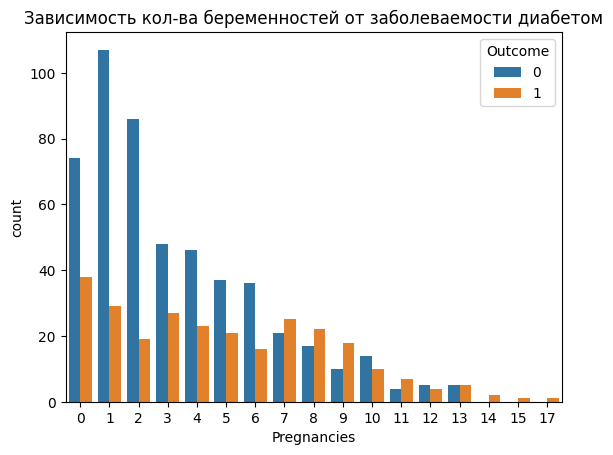

In [28]:
grouped_by_outcome = diabetes_data.groupby(by="Outcome", as_index=False)

barplot = sns.barplot(data=grouped_by_outcome[["Pregnancies"]].value_counts(), x="Pregnancies", y="count", hue="Outcome")
barplot.set_title("Зависимость кол-ва беременностей от заболеваемости диабетом")

<Axes: xlabel='Glucose', ylabel='BloodPressure'>

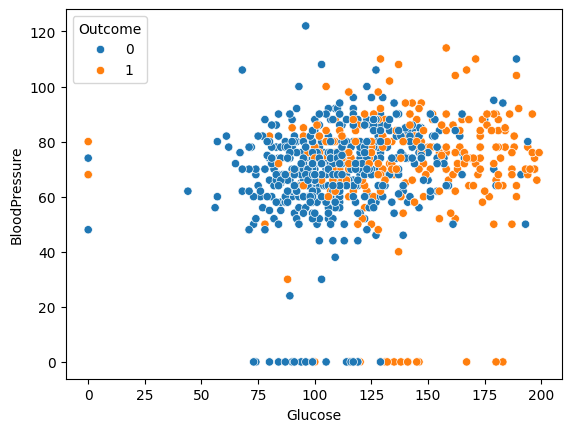

In [35]:
sns.scatterplot(data=diabetes_data, x="Glucose", y="BloodPressure", hue="Outcome")

<Axes: xlabel='SkinThickness', ylabel='BloodPressure'>

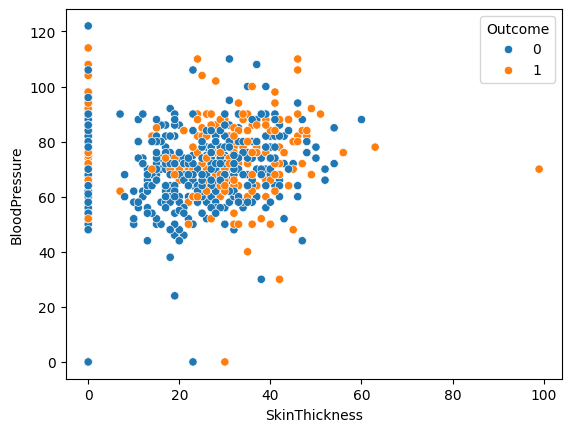

In [36]:
sns.scatterplot(data=diabetes_data, x="SkinThickness", y="BloodPressure", hue="Outcome")

<Axes: xlabel='Age', ylabel='BloodPressure'>

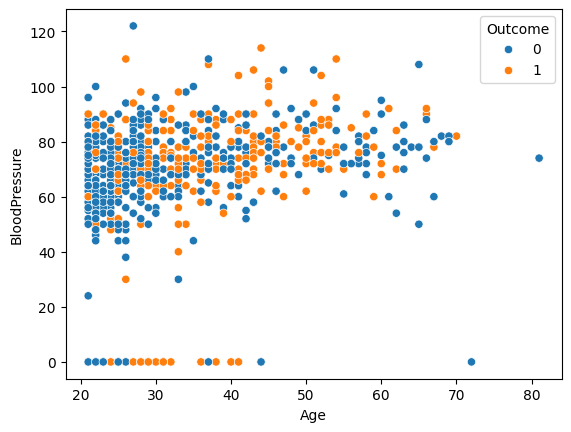

In [39]:
sns.scatterplot(data=diabetes_data, x="Age", y="BloodPressure", hue="Outcome")

<Axes: xlabel='Glucose', ylabel='DiabetesPedigreeFunction'>

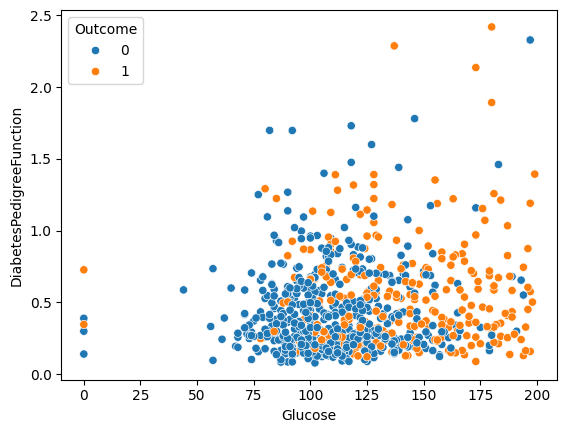

In [49]:
sns.scatterplot(data=diabetes_data, x="Glucose", y="DiabetesPedigreeFunction", hue="Outcome")

In [50]:
diabetes_data = diabetes_data.drop_duplicates(subset=diabetes_data)
diabetes_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   Gender                    768 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 66.0+ KB


In [54]:
low_information_cols = []

for col in diabetes_data.columns:
    top_freq = diabetes_data[col].value_counts(normalize=True).max()
    nunique_ratio = diabetes_data[col].nunique() / diabetes_data[col].count()
    
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')
        
diabetes_data = diabetes_data.drop(low_information_cols, axis=1)
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [70]:
cols_for_replacement = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
diabetes_data[cols_for_replacement] = diabetes_data[cols_for_replacement].replace(0, np.nan)
diabetes_data["Insulin"].isnull().value_counts(normalize=True)

Insulin
False    0.513021
True     0.486979
Name: proportion, dtype: float64

In [78]:
cols_null_percent = diabetes_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent > 30].sort_values(ascending=False)
diabetes_data = diabetes_data.drop(cols_with_null.index, axis=1)
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   BMI                       757 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 54.0 KB


In [79]:
thresh = diabetes_data.shape[1] - 2

diabetes_data = diabetes_data.dropna(thresh=thresh, axis=0)
diabetes_data.shape[0]

761

In [83]:
values_to_fill = {
    "Glucose" : diabetes_data["Glucose"].median(), 
    "BloodPressure": diabetes_data["BloodPressure"].median(),
    "SkinThickness": diabetes_data["SkinThickness"].median(),
    "BMI": diabetes_data["BMI"].median()
}
diabetes_data = diabetes_data.fillna(value=values_to_fill)
round(diabetes_data["SkinThickness"].mean(), 1)

np.float64(29.1)

In [89]:
def outliers_iqr(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_2 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_2 - quartile_1
    lower_bound = quartile_1 - iqr * 1.5
    upper_bound = quartile_2 + iqr * 1.5
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned
    

In [85]:
outliers, cleaned = outliers_iqr(diabetes_data, "SkinThickness")
outliers.shape[0]

87

In [86]:
def outliers_z_score(data, feature):
    x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 *  sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [87]:
outliers, cleaned = outliers_z_score(diabetes_data, "SkinThickness")
outliers.shape[0]

4

In [90]:
outliers, cleaned = outliers_iqr(diabetes_data, "DiabetesPedigreeFunction")
print(f"Кол-во выбросов по IQR без логарифмирования: {outliers.shape[0]}")
outliers, cleaned = outliers_iqr(diabetes_data, "DiabetesPedigreeFunction", log_scale=True)
print(f"Кол-во выбросов по IQR c логарифмированием: {outliers.shape[0]}")

Кол-во выбросов по IQR без логарифмирования: 29
Кол-во выбросов по IQR c логарифмированием: 0
